## Porządkujemy kod i piszemy zestaw narzędzi do przetwarzania obrazów

Z uwagi że fragmenty kodu będziem wykorzystywać wielokrotnie, uporządkujemy je sobie w funkcje, do których będziemy się odwoływać wielokrotnie. Od dziś (no prawie do końca semestru) będziemy dopisywać nowe funkcje, rozszerzać je i testować, aż finalnie otrzymamy paczkę (bibliotekę) narzędzi do przetwarzania obrazów

Zacznijmy od czegoś prostego.

In [92]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

In [101]:
def wczytaj_obraz(sciezka):
    return Image.open(sciezka)

def obraz_do_macierz(obraz):
    return np.array(obraz)

def macierz_do_obraz(macierz):
    return Image.fromarray(macierz)

def rozbij_na_kanaly(obraz):
    macierz = obraz_do_macierz(obraz)
    k1 = macierz[:,:,0]
    k2 = macierz[:,:,1]
    k3 = macierz[:,:,2]
    return k1, k2, k3

def zloz(kanal1,kanal2,kanal3):
    macierz = np.stack((kanal1, kanal2, kanal3),axis=2)
    return macierz_do_obraz(macierz)

def obrot(obraz):
    macierz = obraz_do_macierz(obraz)
    obrocona = np.rot90(macierz)
    return macierz_do_obraz(obrocona)

def odbicie(obraz):
    macierz = obraz_do_macierz(obraz)
    obrocona = np.fliplr(macierz)
    return macierz_do_obraz(obrocona)

def zlicz(macierz):
    zliczenie = OrderedDict()
    for wiersz in macierz.tolist():
        for wartosc in wiersz:
            if wartosc in zliczenie.keys():
                zliczenie[wartosc] += 1
            else:
                zliczenie[wartosc] = 1
    return zliczenie

def histogram(obraz):
    k1, k2, k3 = rozbij_na_kanaly(obraz)
    histR = zlicz(k1)
    histG = zlicz(k2)
    histB = zlicz(k3)
    plt.figure(figsize=(15,4))
    plt.bar(histR.keys(), histR.values(), color = 'red', alpha = .8)
    plt.bar(histG.keys(), histG.values(), color = 'green', alpha = .8)
    plt.bar(histB.keys(), histB.values(), color = 'blue', alpha = .8)


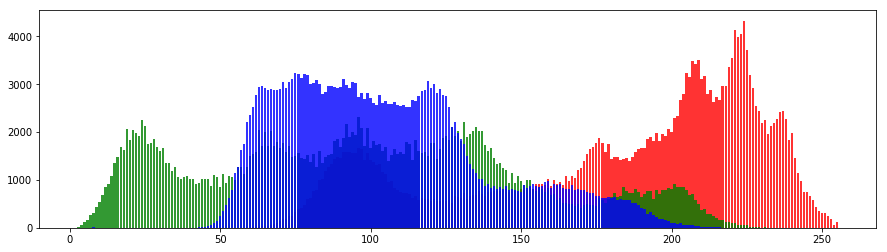

In [102]:
o = wczytaj_obraz("Lena.png")
histogram(o)